In [2]:
import pandas as pd

# Chargement du fichier
df = pd.read_csv("dataframefinal_5%.csv")

# Aperçu des premières lignes
df.head()


/tmp/ipykernel_10724/62096970.py:4: DtypeWarning: Columns (15,26,48,58,60,62,65,67,74,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataframefinal_5%.csv")


,Date_réception_DPE,Date_établissement_DPE,Modèle_DPE,Date_fin_validité_DPE,Version_DPE,Méthode_application_DPE,Etiquette_DPE,Etiquette_GES,Année_construction,Type_bâtiment,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Adresse
0,2021-07-20,2021-07-20,DPE 3CL 2021 méthode logement,2031-07-19,1.0,dpe appartement individuel,D,D,1989.0,appartement,...,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,"20 AV CHARLES DE GAULLE, 25500 MORTEAU"
1,2021-08-07,2021-08-07,DPE 3CL 2021 méthode logement,2031-08-06,1.0,dpe appartement individuel,D,D,1995.0,appartement,...,1,2.0,Appartement,NaN,60.0,3.0,NaN,NaN,NaN,"20 AV CHARLES DE GAULLE, 25500 MORTEAU"
2,2021-11-16,2021-11-16,DPE 3CL 2021 méthode logement,2031-11-15,1.1,dpe appartement individuel,D,B,1947.0,appartement,...,1,2.0,Appartement,NaN,67.0,3.0,NaN,NaN,NaN,"6 RUE DE LA HALLE, 25300 PONTARLIER"
3,2021-07-19,2021-07-19,DPE 3CL 2021 méthode logement,2031-07-18,1.0,dpe appartement individuel,C,C,1983.0,appartement,...,1,2.0,Appartement,NaN,93.0,4.0,NaN,NaN,NaN,"19 RUE LOUIS ARAGON, 25400 AUDINCOURT"
4,2021-09-27,2021-09-20,DPE 3CL 2021 méthode logement,2031-09-19,1.0,dpe appartement individuel,G,G,1947.0,appartement,...,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN,"8 RUE DES GRANDS JARDINS, 25200 MONTBELIARD"


In [3]:
print(df.columns)


Index(['Date_réception_DPE', 'Date_établissement_DPE', 'Modèle_DPE',
       'Date_fin_validité_DPE', 'Version_DPE', 'Méthode_application_DPE',
       'Etiquette_DPE', 'Etiquette_GES', 'Année_construction', 'Type_bâtiment',
       'Période_construction', 'Surface_habitable_logement', 'Adresse_brute',
       'Nom__commune_(BAN)', 'Code_INSEE_(BAN)', 'N°_voie_(BAN)',
       'Identifiant__BAN', 'Adresse_(BAN)', 'Code_postal_(BAN)', 'Score_BAN',
       'Nom__rue_(BAN)', 'Coordonnée_cartographique_X_(BAN)',
       'Coordonnée_cartographique_Y_(BAN)', 'Code_postal_(brut)',
       'N°_étage_appartement', 'Nom_résidence', 'Cage_d'escalier',
       'Complément_d'adresse_logement', 'Statut_géocodage',
       'Nom__commune_(Brut)', 'N°_département_(BAN)', 'N°_région_(BAN)',
       'Complément_d'adresse_bâtiment', 'Adresse_Normalisee',
       'Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No d

In [3]:
# Calcul des proportions de chaque lettre DPE
proportions_dpe = df['Etiquette_DPE'].value_counts(normalize=True)

# Affichage des résultats en pourcentage
print(proportions_dpe * 100)


Etiquette_DPE
D    33.913130
E    23.815178
C    23.058276
F     9.847630
G     7.033739
B     1.875928
A     0.456120
Name: proportion, dtype: float64


In [4]:
map_dpe = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['classe_energie_num'] = df['Etiquette_DPE'].map(map_dpe)


In [7]:
df_plot['Valeur fonciere'] = pd.to_numeric(df_plot['Valeur fonciere'], errors='coerce')


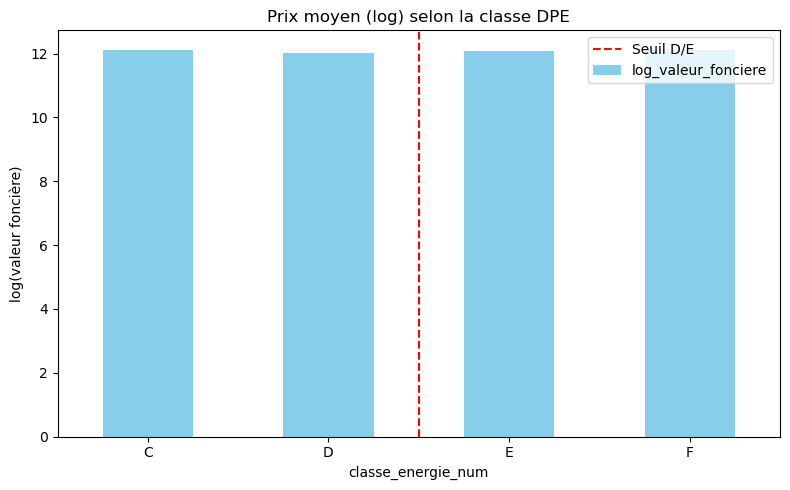

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Nettoyage de la colonne 'Valeur fonciere'
df['Valeur fonciere'] = df['Valeur fonciere'].astype(str)  # au cas où certaines valeurs ne sont pas en string
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(' ', '').str.replace(',', '.')
df['Valeur fonciere'] = pd.to_numeric(df['Valeur fonciere'], errors='coerce')

# 2. Création de la variable numérique du DPE
map_dpe = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['classe_energie_num'] = df['Etiquette_DPE'].map(map_dpe)

# 3. Calcul du log de la valeur foncière
df['log_valeur_fonciere'] = np.log(df['Valeur fonciere'])

# 4. Filtrage des données autour du seuil D/E pour rendre le graphe plus lisible
df_plot = df[df['classe_energie_num'].isin([3, 4, 5, 6])].copy()
df_plot = df_plot.dropna(subset=['log_valeur_fonciere'])

# 5. Calcul des prix moyens par classe énergétique
mean_prices = df_plot.groupby('classe_energie_num')['log_valeur_fonciere'].mean()

# 6. Affichage du graphe
plt.figure(figsize=(8, 5))
mean_prices.plot(kind='bar', color='skyblue', label='log_valeur_fonciere')
plt.xticks(ticks=[0, 1, 2, 3], labels=['C', 'D', 'E', 'F'], rotation=0)
plt.axvline(x=1.5, color='red', linestyle='--', label='Seuil D/E')
plt.title('Prix moyen (log) selon la classe DPE')
plt.ylabel('log(valeur foncière)')
plt.legend()
plt.tight_layout()
plt.show()

